# NetworkX to Bokeh | Layout for Custom Node position

In [1]:
import sys

import matplotlib.pyplot as plt
import networkx as nx
import bokeh
from bokeh.io import show, output_notebook
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, StaticLayoutProvider
from bokeh.models.graphs import from_networkx

%matplotlib inline

In [2]:
print('NetworkX: {}'.format(nx.__version__))
print('Bokeh: {}'.format(bokeh.__version__))
print('Python: {}.{}.{}'.format(sys.version_info.major, sys.version_info.minor, sys.version_info.micro))

NetworkX: 2.2
Bokeh: 0.13.0
Python: 3.6.2


## Prepare data

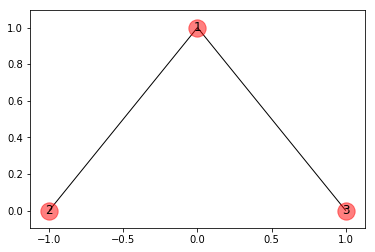

In [3]:
# prepare graph data
node_datasource = [1, 2, 3]
edge_datasource = [(1, 2), (1, 3)]

G = nx.Graph()
G.add_nodes_from(node_datasource)
G.add_edges_from(edge_datasource)

# prepare position data
fixed_layout = {1: [0, 1],
                2: [-1, 0],
                3: [1, 0]}

# show 
fig = plt.figure()
nx.draw_networkx_nodes(G, pos=fixed_layout, alpha=0.5)
nx.draw_networkx_labels(G, pos=fixed_layout)
nx.draw_networkx_edges(G, pos=fixed_layout)
plt.show()

## Convert to Bokeh

In [4]:
# from_networkx requires a layout function.
# Therefore, specify nx.spring_layout as a dummy.
graph_renderer = from_networkx(G, nx.spring_layout)

# show
plot = Plot(plot_width=300, plot_height=300,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.renderers.append(graph_renderer)

output_notebook()
show(plot)

Loading BokehJS ...

## Customize Layout
- layout_provider | GraphRenderer
    - https://bokeh.pydata.org/en/latest/docs/reference/models/renderers.html#bokeh.models.renderers.GraphRenderer.layout_provider
    
The following pages are helpful too.   
https://bokeh.pydata.org/en/latest/docs/user_guide/examples/graph_customize.html
> graph_layout = dict(zip(node_indices, zip(x, y)))   
> graph.layout_provider = StaticLayoutProvider(graph_layout=graph_layout)


In [5]:
# graph_layout seems to contain the layout of the nodes
graph_renderer.layout_provider.graph_layout

{1: array([ -1.47944857e-05,   1.14194118e-03]),
 2: array([-0.01320913,  0.99885806]),
 3: array([ 0.01322393, -1.        ])}

In [6]:
fixed_layout

{1: [0, 1], 2: [-1, 0], 3: [1, 0]}

In [7]:
# !!! Update graph_layout with fixed position !!!
fixed_layout_provider = StaticLayoutProvider(graph_layout=fixed_layout)
graph_renderer.layout_provider = fixed_layout_provider

plot = Plot(plot_width=300, plot_height=300,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.renderers.append(graph_renderer)

output_notebook()
show(plot)

Loading BokehJS ...